F:\anconda\envs\tensorflow\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


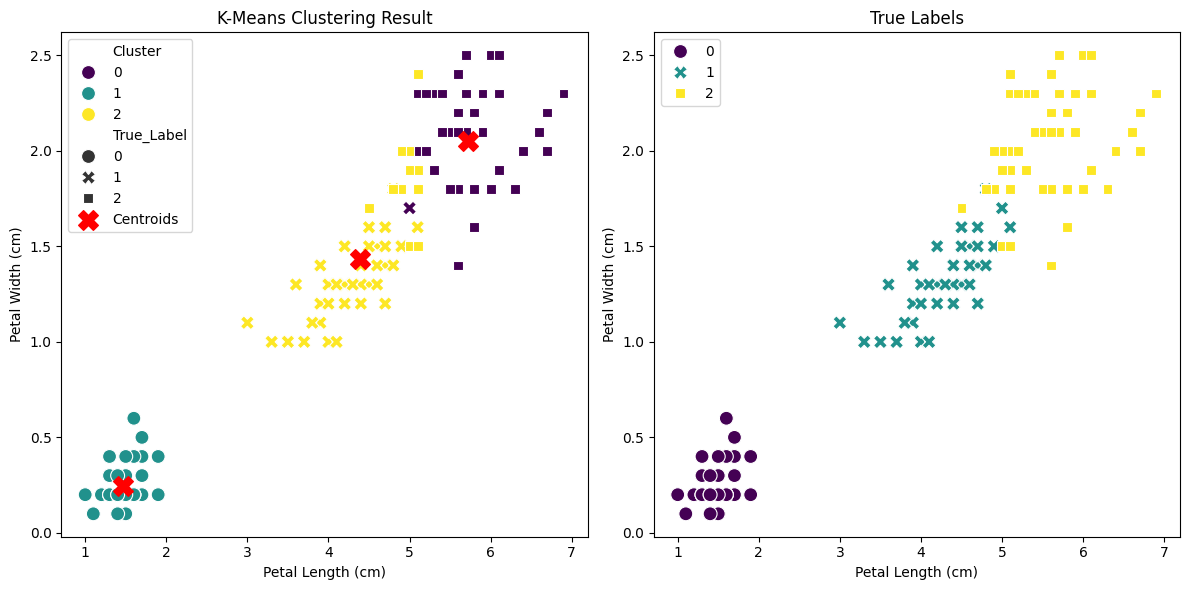

In [4]:
# 导入必要的库
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data  # 特征数据
y = iris.target  # 真实标签（用于对比聚类结果）

# 创建KMeans模型对象
# 假设我们不知道真实类别数，选择K=3进行聚类
kmeans = KMeans(n_clusters=3, random_state=42)  # 设置聚类数为3，随机种子为42

# 训练模型（聚类）
kmeans.fit(X)

# 获取聚类结果
cluster_labels = kmeans.labels_  # 聚类后的标签
cluster_centers = kmeans.cluster_centers_  # 聚类中心

# 将聚类结果和原始数据合并为一个DataFrame，方便可视化
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['Cluster'] = cluster_labels
iris_df['True_Label'] = y

# 可视化聚类结果
plt.figure(figsize=(12, 6))

# 绘制聚类结果（以花瓣长度和花瓣宽度为例）
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='petal length (cm)', y='petal width (cm)',
    hue='Cluster', palette='viridis', data=iris_df,
    style='True_Label', markers=True, s=100
)
plt.title('K-Means Clustering Result')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

# 绘制聚类中心
plt.scatter(cluster_centers[:, 2], cluster_centers[:, 3],
            c='red', s=200, marker='X', label='Centroids')
plt.legend()

# 绘制真实标签（以花瓣长度和花瓣宽度为例）
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='petal length (cm)', y='petal width (cm)',
    hue='True_Label', palette='viridis', data=iris_df,
    style='True_Label', markers=True, s=100
)
plt.title('True Labels')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

plt.tight_layout()
plt.show()

eps=0.3: 发现5个簇，噪声点107个
eps=0.5: 发现2个簇，噪声点33个
eps=0.7: 发现2个簇，噪声点5个


F:\anconda\envs\tensorflow\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33852 (\N{CJK UNIFIED IDEOGRAPH-843C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
F:\anconda\envs\tensorflow\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29255 (\N{CJK UNIFIED IDEOGRAPH-7247}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
F:\anconda\envs\tensorflow\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23485 (\N{CJK UNIFIED IDEOGRAPH-5BBD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
F:\anconda\envs\tensorflow\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
F:\anconda\envs\tensorflow\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) 

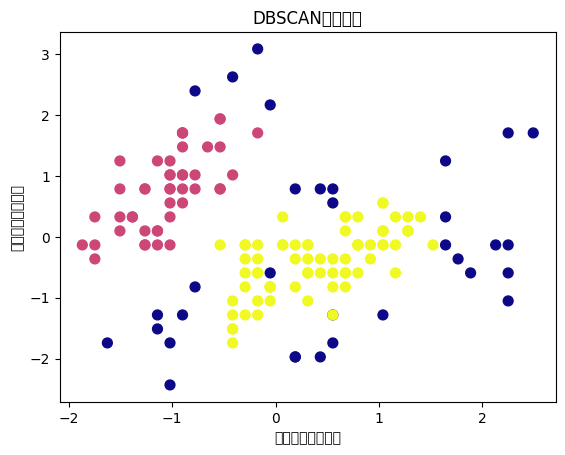

In [5]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 数据加载与预处理
iris = load_iris()
X = StandardScaler().fit_transform(iris.data)

# 参数优化过程
for eps in [0.3, 0.5, 0.7]:
    db = DBSCAN(eps=eps, min_samples=4)
    labels = db.fit_predict(X)
    print(f"eps={eps}: 发现{max(labels)+1}个簇，噪声点{(labels==-1).sum()}个")

# 最佳参数可视化
db = DBSCAN(eps=0.5, min_samples=4)
labels = db.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='plasma')
plt.xlabel('萼片长度标准化值')
plt.ylabel('萼片宽度标准化值')
plt.title('DBSCAN聚类结果')
plt.show()